# Логические методы. Деревья решений

In [7]:
%pylab inline
from IPython.display import Image 

Populating the interactive namespace from numpy and matplotlib


In [3]:
Image(url="https://lh4.googleusercontent.com/v9UQUwaQTAXVH90b-Ugyw2_61_uErfYvTBtG-RNRNB_eHUFq9AmAN_2IOdfOETnbXImnQVN-wPC7_YzDgf7urCeyhyx5UZmuSwV8BVsV8VnHxl1KtgpuxDifJ4pLE23ooYXLlnc")

# Построение дерева решений

### Энтропия

Шенноновская энтропия для системы с N возможными состояниями определяется следующим образом:
$$
S=-\sum\limits_{i=1}^N p_i \log p_i,
$$
где $p_i$ вероятность пребывания системы в состоянии $i$.

### Пример

Для понимания того как энтропия используется при построении дерева решений рассмотрим игрушечный пример, в котором необходимо предсказать цвет шара в зависимости от его положения на оси $x$.

![](https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png)

В данном примере 9 синих и 11 желтых шаров.
Вероятность случайно выбранного шара оказаться синим $p_1 = \frac{9}{20}$,
желтым - $p_2 = \frac{11}{20}$.
Энтропия такой системы $S_0 = - \frac{9}{20}\log\frac{9}{20} - \frac{11}{20}\log\frac{11}{20} \approx 1.0$.

Само значение энтропии пока не дает нам дополнительной информации, но мы рассмотрим как оно поменяется, если мы разобьем оси пополам в точке $x=12$ и для каждой полуоси будет отдельно рассматривать энтропию.

![](https://habrastorage.org/webt/5k/ur/88/5kur88sfin6hoffp6ljbyktcur4.png)

В левой полуоси имеется 8 синих и 5 желтых шаров. Таким образом энтропия в левой полуоси $S_1 = -\frac{5}{13}\log\frac{5}{13} - \frac{8}{13}\log\frac{8}{13} \approx 0.96 $. Энтропия в правой полуоси $S_2 = -\frac{1}{7}\log\frac{1}{7} - \frac{6}{7}\log\frac{6}{7} \approx 0.6$.

Получается, что энтропия в каждой полуоси уменьшилась по сравнению с вариантом без разбиения. Количественное уменьшение интропии называется кол-во информации (Information Gane). Кол-во информации, полученное после разбиение по величине $Q$ (в данном примере "$x \le 12$") равно:
$$
IG = S_0 - \sum\limits_{i=1}^{q}\frac{N_i}{N}S_i.
$$

Здесь $q$ - число новых групп после разбиения. $N_i$ - число элементов, которые оказались в группе $i$, $N$ - общее число элементов до разбиения. Для рассматриваемого примера $q=2$, $N_1 = 13$, $N_2 = 7$. ПОдсатвляя данные значения в формулу получаем:
$$
IG("x \le 12") = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16. 
$$

Положительное значение кол-ва информации показывает, что проведенное разбиение привнесло больше "упорядоченности" в исходную систему.

Мы можем продолжить проводить разбиения и получить следующую картину
![](https://habrastorage.org/webt/o4/nx/p7/o4nxp7itpg_zxowtmffs5xh3bbw.png)

Следует отметить, что энтропия группы, в котором присутсвуют шары только одного цвета равна нулю, так как $\log_2 1 = 0$.

### Алгоритм построения дерева решений

Основной идеей, лежашей в основе таких алгоритмов построения деревьев решений как ID3 и C4.5, является жадный алгоритм максимизации кол-ва информации: на каждой итерации алгоритм выбирает ось разбиения, которая дает максимальное значение кол-ва информации. Итерации повторяются пока энтропия не уменьшиться до нуля или выбранного малого значения. Различные алгоритмы также используют эвристики для "ранней остановки" или "обрезания" деревьев, чтобы измежать переобучения.

```python
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t
```

### Альтернативные критерии

Кроме энтропии при построении деревьев также используются такие критерии как:

 * неопределенность Джини $G = 1 - \sum\limits_i p_i^2$.
 * ошибка классификации $E = 1 - \max\limits_i p_i$.

## Пример

В качестве примера рассмотрим задачу классификации для случая двух признаков

In [12]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

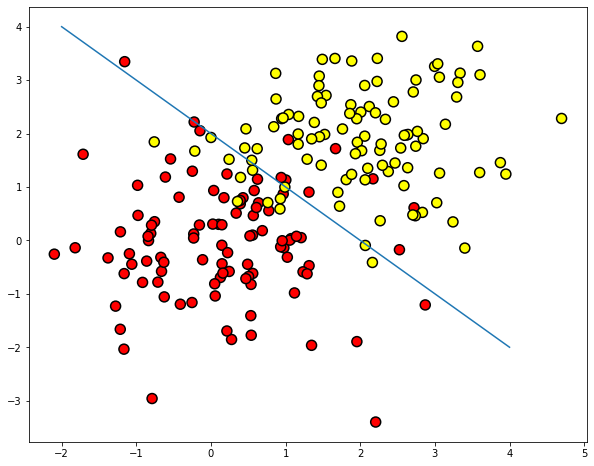

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5);
plt.plot(range(-2,5), range(4,-3,-1));

<ipython-input-14-a9db00306f23>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='autumn')


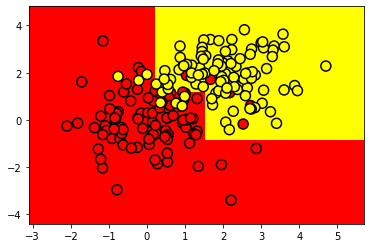

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);

In [16]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

In [19]:
tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], 
                  png_file_to_save='fig/topic3_decision_tree1.png')

![](fig/topic3_decision_tree1.png)

## Деревья решений для задачи регрессии

В случае предсказания значения непрерывной величины идея алгоритма построения дерева остается прежней, меняется только критерий качества:

* разброс
$$
D = \frac{1}{\ell}\sum\limits_{i=1}^\ell(y_i - \frac{1}{\ell}\sum\limits_{j=1}^\ell y_j)^2.
$$

Здесь $\ell$ число элементов в листе, $y_i$ - значения целевой переменной.

### Пример

Сгенерируем искуственный набор данных, который базируется на функции $f(x) = e^{-x^2} + 1.5e^{-(x-2)^2}$ и обучим дерево решений для задачи регрессии.

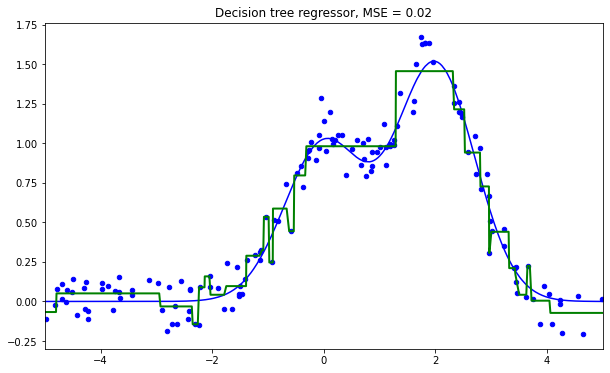

In [20]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()


Из графика хорошо видно, что дерево решений приближает искомое решение с помощью кусочно постоянной функции.

## Исчтоники

1. **Yury Kashnitsky** Topic 3. Classification, Decision Trees and k Nearest Neighbors - [mlcourse.ai](https://mlcourse.ai/articles/topic3-dt-knn/)
1. scikit-learn. Decision trees - [scikit-learn.org](https://scikit-learn.org/stable/modules/tree.html)